# Introduction

Welcome to this series of notebooks where we will evaluate and compare the performance of Logistic Regression and LightGBM classifiers. This comprehensive analysis will be conducted in several stages, each documented in a separate notebook to ensure clarity and organization.

## Series Outline

1. **Exploratory Data Analysis (EDA) and Feature Engineering**:  **<------ This Notebook**
    - In the first notebook, we will perform an in-depth exploratory data analysis (EDA) on our dataset. This step is crucial for understanding the data, identifying patterns, and uncovering any anomalies or missing values. We will also engineer new features that can enhance the predictive power of our models.

2. **Generalized Linear Model (Logistic Regression) Development**:
    - The second notebook will focus on developing a Logistic Regression model. We will train the model and work on improving the base result through the following ways:
        - Balancing an imabalanced dataset
        - Logging continuous features
        - Adding in more advanced encoding techniques
        - Adding interaction terms
        - Regularisation
3. **LightGBM Classifier Development**:
    - In the third notebook, we will develop a LightGBM classifier. LightGBM is a powerful gradient boosting framework that is known for its efficiency and high performance. We will train the model, optimize its parameters using Bayesian Optimisation, and assess its performance.

4. **Model Evaluation and Comparison**:
    - The final notebook will be dedicated to evaluating and comparing the Logistic Regression and LightGBM models. We will use a range of metrics to assess their performance and determine which model is better suited for our dataset. This comparison will help us understand the strengths and weaknesses of each approach and guide us in selecting the most appropriate model for our task.

By the end of this series, we aim to have a thorough understanding of both Logistic Regression and LightGBM classifiers, and be able to make an informed decision on which model to use for our specific problem. Let's dive in!


In [2]:
# Importing Libraries
import pandas as pd
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.metrics import matthews_corrcoef 

c:\Users\Store\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (



# Exploratory Data Analysis (EDA) of Hotel Bookings Dataset

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It involves summarizing the main characteristics of a dataset, often using visual methods. By performing EDA, we can uncover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations.

In this notebook, we will conduct an EDA on a hotel bookings dataset. This dataset contains detailed information about hotel bookings, including the type of hotel, booking status, lead time, arrival dates, length of stay, number of guests, and various other attributes.

The primary objectives of this EDA are:
- To understand the distribution and relationships of various features in the dataset.
- To identify any missing or inconsistent data that needs to be addressed.
- To uncover insights that can inform further analysis or decision-making.

We will start by loading the dataset and examining its structure. Following this, we will perform various analyses and visualizations to explore the data in depth. Let's dive in!


In [3]:
# Importating dataset
df = pd.read_csv("Data\hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
# Checking the shape of the dataset
df.shape

(119390, 32)

In [5]:
# CHecking the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
!pip install scikit-learn

In [6]:
# Looking at numerical summary of the dataset
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
# Checking the different values for each feature
for column in df.columns:
    print(df[column].value_counts())

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64
is_canceled
0    75166
1    44224
Name: count, dtype: int64
lead_time
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: count, Length: 479, dtype: int64
arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64
arrival_date_week_number
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43

In [1]:
# Creating a data frame to assess the number of missing values
nulls = df.isnull().sum()
null_data = {
    'Number of nulls': nulls,
    '% nulls': nulls*100/df.index.size,
}
null_df = pd.DataFrame(null_data)
null_df.sort_values(by='% nulls', ascending=False).head(10)

NameError: name 'df' is not defined

## Sweetviz

Sweetviz is an open-source Python library that generates beautiful, high-density visualizations to kickstart your Exploratory Data Analysis (EDA) with a single line of code. It provides a comprehensive report that includes various statistical summaries and visualizations, making it easier to understand and analyze your data.

### Key Features of Sweetviz:
- **Dataframe Comparison**: Compare two datasets (e.g., training vs. testing data) to understand their differences.
- **Target Analysis**: Analyze the relationship between features and the target variable.
- **Feature Analysis**: Get detailed statistics and visualizations for each feature in the dataset.
- **Interactive HTML Reports**: Generate interactive HTML reports that can be easily shared and explored.

### Why Use Sweetviz?
- **Efficiency**: Automates the EDA process, saving time and effort.
- **Comprehensive**: Provides a wide range of visualizations and statistical summaries.
- **Ease of Use**: Simple API that requires minimal code to generate detailed reports.
- **Interactivity**: Generates interactive reports that can be explored in a web browser.

In this notebook, we will use Sweetviz to perform an initial analysis of our hotel bookings dataset. This will help us gain insights into the data and identify any potential issues or areas for further investigation.


In [9]:
# We can set the target feature to get bivariate analysis
report = sv.analyze(df, target_feat='is_canceled')

                                             |          | [  0%]   00:00 -> (? left)

In [10]:
report.show_html('hotel_intial_sv.html')

Report hotel_intial_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### In the sweetviz report, I noticed several issues that need to be addressed to ensure the data's integrity and usability:

- **Null Values:** There are a small number of null values in the 'children' and 'country' columns.
- **Anomalous Room Type:** The dataset contains rows with an anomalous room type 'L'.
- **Error Entries:** The 'market_segment' and 'distribution_channel' columns have entries labeled as 'Undefined'.
- **Bookings with No Guests:** Some bookings have no guests, indicated by zero values in the 'children', 'adults', and 'babies' columns.
- **Duplicate Rows:** The dataset contains duplicate rows.

#### To fix these issues, we can take the following steps:

- **Replace Null Values:** Fill null values in the 'children' column with 0.0 and in the 'country' column with "Unknown".
- **Remove Anomalous Room Type**: Drop rows where the 'assigned_room_type' is 'L'.
- **Handle Error Entries: Replace** 'Undefined' entries in the 'market_segment' and 'distribution_channel' columns with null values.
- **Remove Bookings with No Guests:** Filter out rows where the number of children, adults, and babies are all zero.
- **Eliminate Duplicate Rows:** Drop all duplicate rows and reset the index for a clean, sequential dataset.


By implementing these steps, we ensure that our dataset is clean and ready for further analysis and modeling.

In [11]:
def data_cleaning(raw_data):
    #Replacing the small amount of null values in children and country columns with sensible values
    null_replacements = {"children": 0.0,"country": "Unknown"} 
    clean_data = raw_data.fillna(null_replacements) 
    #Dropping only row with room type L
    clean_data = clean_data[clean_data['assigned_room_type'] != 'L']
    #Replace error entries with nulls
    clean_data['market_segment'].replace('Undefined', np.nan, inplace=True)
    clean_data['distribution_channel'].replace('Undefined', np.nan, inplace=True)
    #Dropping bookings with no guests
    empty_bookings = (clean_data.children == 0) & (clean_data.adults == 0) & (clean_data.babies == 0) # There are no guests when these conditions are true
    clean_data = clean_data[~empty_bookings] 
    #Dropping all the duplicates
    clean_data = clean_data.drop_duplicates()
    clean_data = clean_data.reset_index(drop=True)
    return clean_data
df = data_cleaning(df)

C:\Windows\Temp\ipykernel_25348\826852220.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_data['market_segment'].replace('Undefined', np.nan, inplace=True)
C:\Windows\Temp\ipykernel_25348\826852220.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

In [12]:
# Checking the new size of the df
df.shape

(87229, 32)

Let's explore some key observations from the Sweetviz analysis in greater detail. One significant finding is that our dataset is unbalanced. Recognizing this imbalance is crucial because, if not addressed, our models may become biased towards the majority class. Let's examine the extent of this imbalance in our dataset:

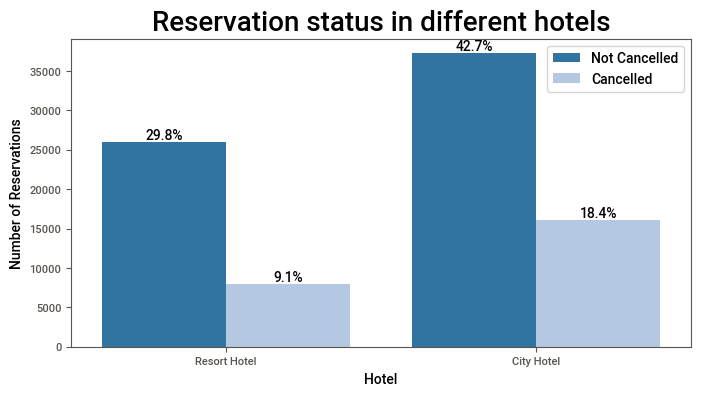

In [13]:
# Set the background color of the figure
plt.figure(figsize=(8, 4), facecolor='#FFFFFF')

# Create the countplot with white and blue color scheme
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette=['#1f77b4', '#aec7e8'])

# Customize legend location
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

# Set plot title and axis labels
plt.title('Reservation status in different hotels', size=20, color='Black')
plt.xlabel('Hotel', color='Black')
plt.ylabel('Number of Reservations', color='Black')

# Calculate and annotate percentages on the bars
total = len(df)
for p in ax1.patches:
    height = p.get_height()
    percentage = f'{height / total:.1%}'
    ax1.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points', color='black')

# Customize legend labels
plt.legend(['Not Cancelled', 'Cancelled'])

# Show the plot
plt.show()

In [14]:
df['is_canceled'].value_counts() *100 / df['is_canceled'].value_counts().sum()

is_canceled
0    72.477043
1    27.522957
Name: count, dtype: float64

Interesting, we will make a mental note of the imbalance and address it later when modelling!

It is also insightful to examine the proportion of customers from Portugal compared to other countries. Given that these are Portuguese hotels, this analysis is particularly relevant. Let's explore:

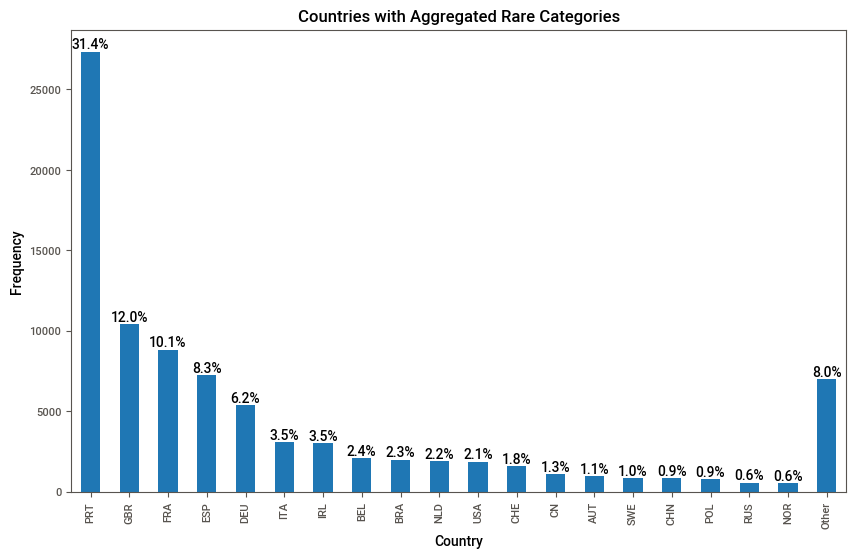

In [15]:
# Count the occurrences of each country in the 'country' column
country_counts = df['country'].value_counts()

# Set a threshold for grouping less frequent countries
threshold = 500

# Group countries with counts above the threshold
grouped_countries = country_counts[country_counts > threshold]

# Sum the counts of countries with counts below or equal to the threshold and label them as 'Other'
grouped_countries['Other'] = country_counts[country_counts <= threshold].sum()

# Plotting the bar chart of the grouped countries with white and blue color scheme
plt.figure(figsize=(10, 6), facecolor='#FFFFFF')
ax = grouped_countries.plot.bar(color='#1f77b4')

# Calculate and annotate percentages on the bars
total = country_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{height / total:.1%}'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', color='black')

# Format the plot
plt.xlabel('Country', color='Black')
plt.ylabel('Frequency', color='Black')
plt.title('Countries with Aggregated Rare Categories', color='Black')

# Display the plot
plt.show()

### Takeaways from EDA:

Based on the exploratory data analysis (EDA), several key actions have been identified to enhance with feature engineering:

- **Total Stay Feature**: Create a feature that sums up the total stay duration, including both weekdays and weekends. This will help in understanding the overall length of stay for each booking.
- **Day of Arrival Mapping**: Map the date of arrival to the corresponding day of the week. This could reveal patterns, such as higher cancellation rates on weekends due to travel issues.
- **Total Guests and Total Minors Features**: Develop features that capture the total number of guests and the total number of minors (children and babies) for each booking. These features can provide insights into booking behaviors and preferences.
- **Country Flags**: Create flags to indicate if the booking country is Portugal and if it is within the European Union (EU). Given that the hotel is in Portugal, these flags can help in segmenting and analyzing the data based on geographical location.
- **Data Leakage Prevention**: Exclude features such as booking changes, reservation status, and date from the model as they can lead to data leakage. These features are often determined after the booking is made and can unfairly influence the model.
- **Understand ADR**: Investigate the meaning of the 'adr' (average daily rate) feature to determine its relevance and how it can be utilized in the analysis.
- **Cyclical Time Features**: Add cyclical identifiers and flags for time-related features. This can help in capturing seasonal patterns and trends in the data.
- **Room mismatch flag**: Interested to see if being assigned an incorrect room influences cancellations

These actions will ensure that our dataset is well-prepared and enriched with meaningful features, setting a solid foundation for the subsequent feature engineering and modeling phases.

In the context of hotel bookings, ADR stands for Average Daily Rate. It is a key performance metric used in the hospitality industry to measure the average revenue earned per occupied room during a specific period of time.

ADR= Number of Rooms Sold / Total Room Revenue
​


# Feature Engineering

Feature engineering is a crucial step in the data preprocessing pipeline that involves creating new features or transforming existing ones to improve the performance of machine learning models. By leveraging domain knowledge and insights gained from exploratory data analysis (EDA), we can craft features that capture the underlying patterns and relationships in the data more effectively.

In this phase, we will focus on generating new features that provide additional context and granularity to our dataset. The goal is to enhance the predictive power of our models by providing them with more informative and relevant inputs.

Key aspects of our feature engineering process will include:

- **Creating Composite Features**: Combining existing features to form new ones that better represent the data. For example, calculating the total stay duration by summing weekdays and weekends.
- **Temporal Feature Engineering**: Transforming date and time-related features to capture seasonal trends and patterns. This includes mapping arrival dates to days of the week and adding cyclical identifiers for time.
- **Geographical Segmentation**: Adding flags to indicate whether a booking is from Portugal or within the EU, which can help in understanding regional booking behaviors.
- **Handling Categorical Variables**: Encoding categorical variables using techniques such as one-hot encoding or target encoding to make them suitable for machine learning algorithms.
- **Preventing Data Leakage**: Ensuring that features that could lead to data leakage, such as booking changes and reservation status, are excluded from the model training process.

By systematically applying these feature engineering techniques, we aim to create a robust and enriched dataset that will enable our machine learning models to achieve better performance and more accurate predictions.

In [18]:
def feature_engineering(clean_data):
    # Add a boolean variable for whether or not an agent was used to book
    clean_data['used_agent'] = np.where(clean_data['agent'].isnull(),0,1)
    # Combining weekdays and weekends for a total nights value
    clean_data['total_nights'] = clean_data['stays_in_weekend_nights'] + clean_data['stays_in_week_nights']
    # Adding a column to map hotel to 0/1
    clean_data['hotel_binary'] = clean_data['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1})
    # Creating a flags for guests coming from Portugal and EU
    df['portugal_flag'] = (df['country'] == 'PRT').astype('float64')
    eu_countries = ['AUT, BEL, BGR, HRV, CYP, CZE, DNK, EST, FIN, FRA, DEU, GRC, HUN, IRL, ITA, LVA, LTU, LUX, MLT, NLD, POL']
    df['eu_flag'] = df['country'].isin(eu_countries).astype('float64')
    # Adding a flag for whether reserved_room_type matches assigned_room_type
    clean_data['room_type_mismatch'] = (clean_data['reserved_room_type'] != clean_data['assigned_room_type']).astype('int')
    
    # Now finding the day of the week for each booking 

    # Dictionary to map the month to its corresponding number
    month_to_number = {
        "January": 1,
        "February": 2,
        "March": 3,
        "April": 4,
        "May": 5,
        "June": 6,
        "July": 7,
        "August": 8,
        "September": 9,
        "October": 10,
        "November": 11,
        "December": 12
    }
    # adding columns for the date of arrivaL
    clean_data['arrival_date_year'] = clean_data['arrival_date_year'].astype(str)
    clean_data['arrival_date_month_number'] = clean_data['arrival_date_month'].map(month_to_number).astype(str).str.zfill(2)  
    clean_data['arrival_date_day_of_month'] = clean_data['arrival_date_day_of_month'].astype(str).str.zfill(2)  
    # string in the format "YYYY-MM-DD"
    clean_data['raw_date_string'] = clean_data['arrival_date_year'] + "-" + \
                                    clean_data['arrival_date_month_number'] + "-" + \
                                    clean_data['arrival_date_day_of_month']
    clean_data['raw_date_string']

    # Creating a function that transforms the date into its corresponding day of the week
    def find_day(raw_date_string):
        date_object = datetime.strptime(raw_date_string, "%Y-%m-%d")
        day_of_week = date_object.weekday()
        return day_of_week
    clean_data['day_of_week_on_arrival'] = clean_data['raw_date_string'].apply(find_day)

    # Adding a column to encode the seasonal affect of which week in the year the booking was made
    period = clean_data['arrival_date_week_number'].nunique()
    two_pi = 2*np.pi
    clean_data['sin_week'] = np.sin(two_pi * clean_data['arrival_date_week_number'] / period)
    clean_data['cos_week'] = np.cos(two_pi * clean_data['arrival_date_week_number'] / period)
    
    
    return clean_data
df = feature_engineering(df)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_nights,hotel_binary,portugal_flag,eu_flag,arrival_date_month_number,raw_date_string,day_of_week_on_arrival,sin_week,cos_week,room_type_mismatch
0,Resort Hotel,0,342,2015,July,27,01,0,0,2,...,0,0,1.0,0.0,07,2015-07-01,2,-0.059241,-0.998244,0
1,Resort Hotel,0,737,2015,July,27,01,0,0,2,...,0,0,1.0,0.0,07,2015-07-01,2,-0.059241,-0.998244,0
2,Resort Hotel,0,7,2015,July,27,01,0,1,1,...,1,0,0.0,0.0,07,2015-07-01,2,-0.059241,-0.998244,1
3,Resort Hotel,0,13,2015,July,27,01,0,1,1,...,1,0,0.0,0.0,07,2015-07-01,2,-0.059241,-0.998244,0
4,Resort Hotel,0,14,2015,July,27,01,0,2,2,...,2,0,0.0,0.0,07,2015-07-01,2,-0.059241,-0.998244,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87224,City Hotel,0,23,2017,August,35,30,2,5,2,...,7,1,0.0,0.0,08,2017-08-30,2,-0.845596,-0.533823,0
87225,City Hotel,0,102,2017,August,35,31,2,5,3,...,7,1,0.0,0.0,08,2017-08-31,3,-0.845596,-0.533823,0
87226,City Hotel,0,34,2017,August,35,31,2,5,2,...,7,1,0.0,0.0,08,2017-08-31,3,-0.845596,-0.533823,0
87227,City Hotel,0,109,2017,August,35,31,2,5,2,...,7,1,0.0,0.0,08,2017-08-31,3,-0.845596,-0.533823,0


Note that we haven't dealt with imputation comprehensively yet as we will do that in the next notebook using sklearn pipelines. 

The final thing I am interested to check if how a mismatched assigned room compared to reserved room affects cancellations:

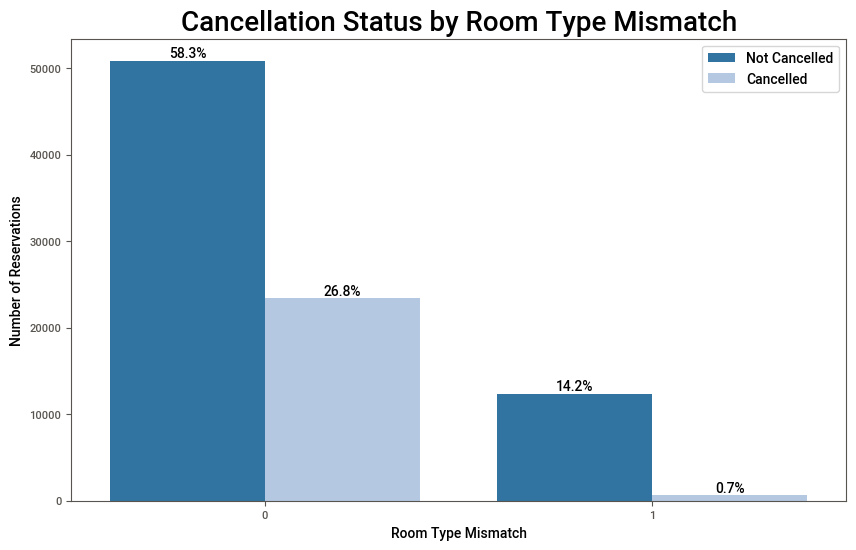

In [19]:
# Set the background color of the figure
plt.figure(figsize=(10, 6), facecolor='#FFFFFF')

# Create the countplot with white and blue color scheme
ax2 = sns.countplot(x='room_type_mismatch', hue='is_canceled', data=df, palette=['#1f77b4', '#aec7e8'])

# Customize legend location
legend_labels, _ = ax2.get_legend_handles_labels()
ax2.legend(bbox_to_anchor=(1, 1))

# Set plot title and axis labels
plt.title('Cancellation Status by Room Type Mismatch', size=20, color='Black')
plt.xlabel('Room Type Mismatch', color='Black')
plt.ylabel('Number of Reservations', color='Black')

# Calculate and annotate percentages on the bars
total = len(df)
for p in ax2.patches:
    height = p.get_height()
    percentage = f'{height / total:.1%}'
    ax2.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points', color='black')

# Customize legend labels
plt.legend(['Not Cancelled', 'Cancelled'])

# Show the plot
plt.show()

I find this very surpising as a higher proportion of guests cancel despite having their assigned room. I imagine that this means most of the mismatches are as a result from free upgrades as suppose to room mess ups on the hotels part.